# **Using PCA for Dimensionality Reduction**

## Using PCA to decompose **Iris dataset** from 4 dimensional feature vector to 2 dimensional feature vector using PCA.



In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [27]:
iris_data = load_iris()
X = iris_data.data
z = StandardScaler()
X = z.fit_transform(X)
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [28]:
class_names_iris = iris_data.feature_names

In [29]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [30]:
print("Shape of Original data :- ",X.shape)
print("Shape of PCA transform data :- ",X_pca.shape)

Shape of Original data :-  (150, 4)
Shape of PCA transform data :-  (150, 2)


Applying **GMM** on the reduced dimension

Silhouette Score for n_components  2  and covariance type  full  :-  0.6145202036230452


Silhouette Score for n_components  2  and covariance type  tied  :-  0.6145202036230452


Silhouette Score for n_components  2  and covariance type  diag  :-  0.6145202036230452


Silhouette Score for n_components  2  and covariance type  spherical  :-  0.6145202036230452


Silhouette Score for n_components  3  and covariance type  full  :-  0.49268792698398794


Silhouette Score for n_components  3  and covariance type  tied  :-  0.481544001468115


Silhouette Score for n_components  3  and covariance type  diag  :-  0.4985441628160271


Silhouette Score for n_components  3  and covariance type  spherical  :-  0.511219959997117


Silhouette Score for n_components  4  and covariance type  full  :-  0.4359748361240842


Silhouette Score for n_components  4  and covariance type  tied  :-  0.41251099848590383


Silhouette Score for n_components  4  and covariance type  diag  :-  0.4714428424779999




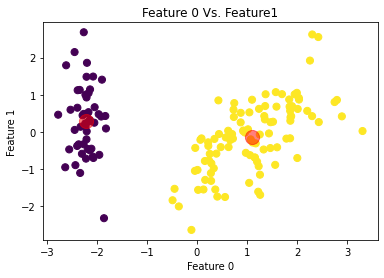

In [31]:
covar_type = ['full' ,'tied','diag','spherical']
components_list = [2,3,4,5,6,7]
model_candidate = []
for component in components_list:
  for type in covar_type:
    EM = GaussianMixture(n_components=component,covariance_type=type)
    EM.fit(X_pca)
    cluster = EM.predict(X_pca)
    centres = EM.means_
    silhouette = silhouette_score(X_pca,cluster)
    print("Silhouette Score for n_components ",component," and covariance type ",type," :- ",silhouette)
    print("\n")
    X = np.column_stack((X_pca, cluster))
    candidate = {
        "n_components":component,
        "covariance_type":type,
        "Silhouette Score":silhouette,
        "cluster":cluster,
        "centres":centres
    }
    model_candidate.append(candidate)
    
best_gmm_iris = max(
                model_candidate, key=lambda x: x["Silhouette Score"]
            )
print("Max. Silhouette Score is ",best_gmm_iris["Silhouette Score"]," and no. of Cluster is ",best_gmm_iris["n_components"]," with Covarience matrix type ",best_gmm_iris["covariance_type"])    


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_gmm_iris["cluster"],s=50, cmap='viridis')
plt.scatter(best_gmm_iris["centres"][:, 0], best_gmm_iris["centres"][:, 1], c='red', s=200, alpha=0.5,marker='o')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Feature 0 Vs. Feature1")
plt.show()  

Appling **KMeans** on reduced dimension

Silhouette Score for n_cluster  2 :-  0.6145202036230452
Silhouette Score for n_cluster  3 :-  0.5091683341538228
Silhouette Score for n_cluster  4 :-  0.4415870071606702
Silhouette Score for n_cluster  5 :-  0.41433775626539066
Silhouette Score for n_cluster  6 :-  0.42556811176946374
Silhouette Score for n_cluster  7 :-  0.4363577769712246
Max. Silhouette Score is  0.6145202036230452  and no. of Cluster is  2


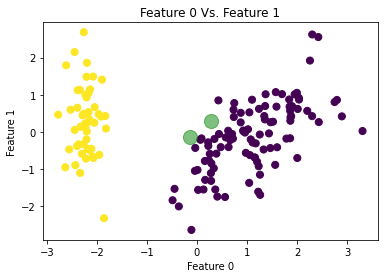

In [41]:
model_candidate_iris = []
for cluster in components_list:
  kmeans = KMeans(n_clusters=cluster)
  kmeans.fit(X_pca)
  cluster_kmeans = kmeans.predict(X_pca)
  centres = kmeans.cluster_centers_
  score = silhouette_score(X_pca,cluster_kmeans)
  print("Silhouette Score for n_cluster ",cluster,":- ",score)
  candidate = {
        "centers":centres,
        "n_cluster":cluster,
        "Silhouette Score":score,
        "cluster_dia":cluster_kmeans
    }
  model_candidate_iris.append(candidate)

best_model_iris = max(
                model_candidate_iris, key=lambda x: x["Silhouette Score"]
            )
print("Max. Silhouette Score is ",best_model_iris["Silhouette Score"]," and no. of Cluster is ",best_model_iris["n_cluster"])


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_model_iris["cluster_dia"],s=50, cmap='viridis')
plt.scatter(best_model_iris["centers"][:, 1], best_model_iris["centers"][:, 1], c='green', s=200, alpha=0.5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Feature 0 Vs. Feature 1")
plt.show()

## Using PCA to decompose **Diabetes dataset** from 8 dimensional feature vector to 2 dimensional feature vector using PCA.



In [33]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df = df.drop('Outcome',axis=1)
X = df.values

In [34]:
col_names = df.columns
print(col_names)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [35]:
Scale = StandardScaler()
X = Scale.fit_transform(X)

Using PCA for Dimensionality Reduction from 8 dimension to 2 dimension.

In [36]:
pca_dia = PCA(n_components=2)
pca_dia.fit(X)
X_pca_dia = pca_dia.transform(X)

Appling **KMeans** on reduced dimension

Silhouette Score for  2  cluster is :-  0.3660642928551447
Silhouette Score for  3  cluster is :-  0.3911448124642482
Silhouette Score for  4  cluster is :-  0.36394569136963767
Silhouette Score for  5  cluster is :-  0.3591529920414261
Silhouette Score for  6  cluster is :-  0.3566750560679804
Silhouette Score for  7  cluster is :-  0.3505462351438713
Silhouette Score for  8  cluster is :-  0.3702499196793802
Silhouette Score for  9  cluster is :-  0.3707217165551136
Max. Silhouette Score is 0.3911448124642482 and no. of Cluster is 3


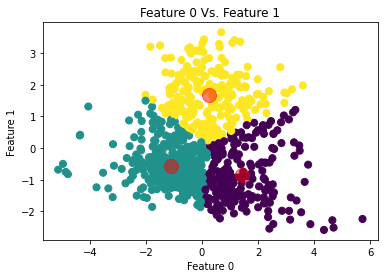

In [37]:
cluster_list_dia = [2,3,4,5,6,7,8,9]
model_candidate_dia = []
for no_cluster in cluster_list_dia:
  km_dia = KMeans(n_clusters=no_cluster)
  cluster_dia = km_dia.fit_predict(X_pca_dia)
  score = silhouette_score(X_pca_dia,cluster_dia)
  centres = km_dia.cluster_centers_
  print("Silhouette Score for ",no_cluster," cluster is :- ",score)
  candidate = {
        "centers":centres,
        "n_cluster":no_cluster,
        "Silhouette Score":score,
        "cluster_dia":cluster_dia
    }
  model_candidate_dia.append(candidate)
  
best_model = max(
                model_candidate_dia, key=lambda x: x["Silhouette Score"]
            )

print("Max. Silhouette Score is "+ str(best_model["Silhouette Score"])+" and no. of Cluster is "+str(best_model["n_cluster"]))

plt.scatter(X_pca_dia[:, 0], X_pca_dia[:, 1], c=best_model["cluster_dia"],s=50, cmap='viridis')
plt.scatter(best_model["centers"][:, 0], best_model["centers"][:, 1], c='red', s=200, alpha=0.5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Feature 0 Vs. Feature 1")
plt.show()


Applying **GMM** on the reduced dimension

Silhouette Score for n_components  2  and covariance type  full  :-  0.3395881592210788


Silhouette Score for n_components  2  and covariance type  tied  :-  0.3677159018413991


Silhouette Score for n_components  2  and covariance type  tied  :-  0.3677159018413991


Silhouette Score for n_components  2  and covariance type  spherical  :-  0.2454050121660302


Silhouette Score for n_components  3  and covariance type  full  :-  0.30607676627162933


Silhouette Score for n_components  3  and covariance type  tied  :-  0.37332427870043555


Silhouette Score for n_components  3  and covariance type  tied  :-  0.37332427870043555


Silhouette Score for n_components  3  and covariance type  spherical  :-  0.38663875605657605


Silhouette Score for n_components  4  and covariance type  full  :-  0.2550196572161377


Silhouette Score for n_components  4  and covariance type  tied  :-  0.31134030868308504


Silhouette Score for n_components  4  and covariance type  tied  :-  0.27014369461516

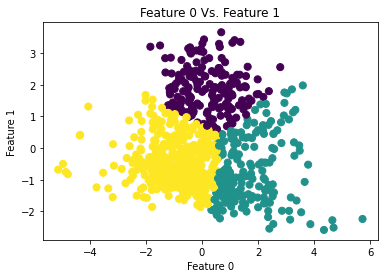

In [40]:
covar_type = ['full' ,'tied','tied','spherical']
components_list = [2,3,4,5,6,7]
model_candidate_dia = []
for component in components_list:
  for type in covar_type:
    EM_dia = GaussianMixture(n_components=component,covariance_type=type)
    EM_dia.fit(X_pca_dia)
    cluster = EM_dia.predict(X_pca_dia)
    centers = EM_dia.means_
    silhouette = silhouette_score(X_pca_dia,cluster)
    print("Silhouette Score for n_components ",component," and covariance type ",type," :- ",silhouette)
    print("\n")
    candidate = {
        "n_components":component,
        "covariance_type":type,
        "Silhouette Score":silhouette,
        "cluster":cluster,
        "centres":centres
    }
    model_candidate_dia.append(candidate)
    
best_gmm_dia = max(
                model_candidate_dia, key=lambda x: x["Silhouette Score"]
            )

print("Max. Silhouette Score is ",best_gmm_dia["Silhouette Score"]," and no. of Cluster is ",best_gmm_dia["n_components"]," with Covarience matrix type ",best_gmm_dia["covariance_type"])    

plt.scatter(X_pca_dia[:, 0], X_pca_dia[:, 1], c=best_gmm_dia["cluster"],s=50, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Feature 0 Vs. Feature 1')
plt.show()   
